In [1]:
# Run each time you're on a new Google CoLab setup or 
! pip install nltk
! pip install bs4
! pip install requests
import nltk
nltk.download('punkt')
nltk.download('words')
nltk.download('book')

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kelvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\kelvi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\kelvi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\kelvi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\kelvi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data] 

True

In [2]:
from bs4 import BeautifulSoup
import nltk
import requests

In [3]:
text = requests.get("http://inta.gatech.s3.amazonaws.com/crime_and_punishment.txt").text
# text = requests.get("http://www.gutenberg.org/files/2554/2554.txt").content
print(text[0:100]) # Here are the first 100 characters of Project Gutenberg's crime and punishment
print('length of text: %s characters' % len(text))

ï»¿The Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky

This eBook is for th
length of text: 1177120 characters


In [4]:
tokens = nltk.word_tokenize(text)
# print the number of word "tokens" in the book:
print('There are %s words in crime and punishment' % len(tokens))

There are 253750 words in crime and punishment


In [5]:
text = nltk.Text(tokens)
# Create an NLTK text object, in case you want to use some of the nltk.text functions
# http://www.nltk.org/api/nltk.html#module-nltk.text 
print(text[500])

a


In [6]:
# Do word counts using the defaultdict construction in python
# Defaultdicts are dicts where looking for a missing key gives a default value instead of an error
# An int-based defaultdict would return a zero-integer. So starting with a defaultdict and 
# incrementing hte value every time a word occurs will give a word count
from collections import defaultdict
counts=defaultdict(int)
for word in text:
    counts[word]+=1
print('the word "%s" appeared %s times' % ('the',counts['the']))
# To sort the wordcount, do:
sorted_counts=sorted(counts.items(), key=lambda x: -x[1])
print('the word "%s" is the most common, appearing %s times' % (sorted_counts[0][0], sorted_counts[0][1]))


the word "the" appeared 7431 times
the word "," is the most common, appearing 16176 times


In [7]:
# An alternative way to do word counts is the "Counter" object
from collections import Counter
counts = Counter(text)
print('the word "%s" appeared %s times' % ('the',counts['the']))
# If you print "counts", it will print the sorted wordcount

the word "the" appeared 7431 times


In [8]:
#How many unique words are there?
#This should be the length of the word count dictionary
print('There are %s unique words' % len(sorted_counts))

There are 11247 unique words


In [9]:
# To figure out how many of these words are English words, we need an english dictionary
english=nltk.corpus.words.words('en')

print(english[0:15])
# load an english dictionary (i.e. list of english words) from nltk

english = list(set([w.lower() for w in english]))
# Then make sure all words are lowercase - so we would accept 'aaron' as a word, no matter the capitalization

['A', 'a', 'aa', 'aal', 'aalii', 'aam', 'Aani', 'aardvark', 'aardwolf', 'Aaron', 'Aaronic', 'Aaronical', 'Aaronite', 'Aaronitic', 'Aaru']


In [10]:
es=set(english)
ws=set(counts.keys())
overlap = ws.intersection(es)
missing = ws.difference(es)
print('%s of the words in C&P are in the English dictionary, out of %s' % (len(overlap),len(ws)))
print('A few c&p words missing from the english dictionary: %s' % str(list(missing)[0:10]))

6573 of the words in C&P are in the English dictionary, out of 11247
A few c&p words missing from the english dictionary: ['popped', 'See', '_pan_', 'PG', 'strangled', 'concerns', 'EXCEPT', 'Majesty', 'pushed', '_the']


In [11]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [12]:
from collections import Counter
b=Counter(text)


Below this line, we're dealing with data downloaded from a website.

In [13]:
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
url_response_object=requests.get(url)
url_response_object.raise_for_status()
html = url_response_object.content
print(html[0:100]) # Here's what some of the html looks like

b'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/loose'


In [14]:
raw = BeautifulSoup(html).get_text()
print(raw[0:100]) # Here's what the text looks like, after removing these html tags



BBC NEWS | Health | Blondes 'to die out in 200 years'




































NEWS
  S


In [15]:
raw[1:100]

"\nBBC NEWS | Health | Blondes 'to die out in 200 years'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nNEWS\n\xa0\xa0S"

In [16]:
tokens = nltk.word_tokenize(raw)
print(tokens[0:15]) # Here we've split things out by whitespace into a list of "tokens" or words/punctuation

['BBC', 'NEWS', '|', 'Health', '|', 'Blondes', "'to", 'die', 'out', 'in', '200', "years'", 'NEWS', 'SPORT', 'WEATHER']


In [17]:
len(tokens)

745

In [18]:
tokens[0:10]

['BBC', 'NEWS', '|', 'Health', '|', 'Blondes', "'to", 'die', 'out', 'in']

Below this line, I changed and experiment of the code and explore the libraries

In [19]:
print('the word "%s" appeared %s times' % ('Raskolnikov',counts['Raskolnikov']))
print('the word "%s" appeared %s times' % ('Sonia',counts['Sonia']))

the word "Raskolnikov" appeared 778 times
the word "Sonia" appeared 399 times


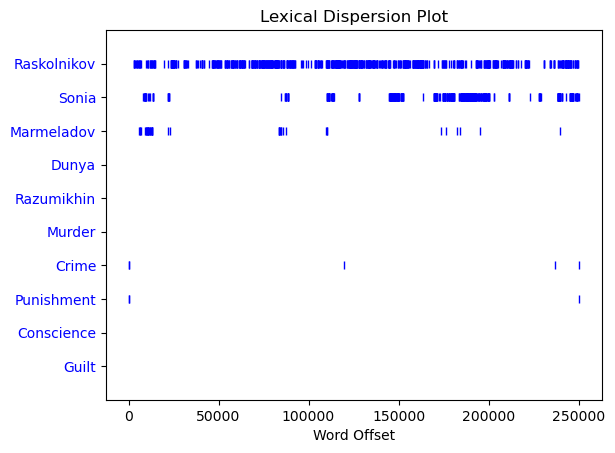

In [20]:
words_to_track = ['Raskolnikov', 'Sonia', 'Marmeladov', 'Dunya', 'Razumikhin','Murder','Crime','Punishment','Conscience','Guilt']

# Generate the dispersion plot
text.dispersion_plot(words_to_track)

In [21]:
sorted_counts[:10]

[(',', 16176),
 ('.', 9854),
 ('the', 7431),
 ('and', 6279),
 ('to', 5276),
 ('a', 4469),
 ('I', 4366),
 ("''", 4192),
 ('of', 3847),
 ('``', 3739)]

In [22]:
url = "https://m.gsmarena.com/sony_xperia_1_vi-review-2699.php"
url_response_object=requests.get(url)
url_response_object.raise_for_status()
html = url_response_object.content

In [23]:
raw_xperia=BeautifulSoup(html).get_text()

In [24]:
html[:20]

b'<!DOCTYPE html> \r\n<h'

In [25]:
raw_xperia[:20]

'\n\nSony Xperia 1 VI r'

In [26]:
tokens_xp = nltk.word_tokenize(raw_xperia)

In [27]:
tokens_xp[:20]

['Sony',
 'Xperia',
 '1',
 'VI',
 'review',
 '-',
 'GSMArena.com',
 'tests',
 'Login',
 'I',
 'forgot',
 'my',
 'password',
 'Home',
 'Compare',
 'Tip',
 'us',
 'Privacy',
 'News',
 'Daily']

In [28]:
text_xp = nltk.Text(tokens_xp)

In [45]:
counts=Counter(text_xp)
# Check the counts data structure
# counts

In [30]:
# Wonder if there is any method that can do the similar thing like 
# sorted(counts.items(), key=lambda x: -x[1])
top_n_counts = counts.most_common(5)
top_n_counts


[(',', 75), ('.', 40), ('the', 25), ('and', 19), (':', 18)]

In [31]:
from wordcloud import WordCloud

In [32]:
# print(1

In [33]:
text1 = text = requests.get("http://inta.gatech.s3.amazonaws.com/crime_and_punishment.txt").text

In [34]:

from nltk.tokenize import WordPunctTokenizer
word_tokenizer = WordPunctTokenizer()

In [35]:
tokens =word_tokenizer.tokenize(text1)

In [36]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [37]:
alpha_words = [word.lower() for word in tokens if word.isalpha() and len(word) > 2 and word not in stop_words]

In [38]:
word_lemmatizer = nltk.WordNetLemmatizer()

In [39]:
# nltk.download('omw-1.4')

In [40]:
final_words = [word_lemmatizer.lemmatize(word) for word in alpha_words]

In [41]:
vocabulary_dict = defaultdict(int)
for word in final_words:
    vocabulary_dict[word] += 1

In [42]:
# word_tokenizer = WordPunctTokenizer()
# vocabulary_dict = defaultdict(int)
# cleansed_documents = []
# for doc in documents:
#     tokens = word_tokenizer.tokenize(doc)
#     alpha_words = [word.lower() for word in tokens if word.isalpha() and len(word) > 2 and word not in stop_words]
#     final_words = [word_lemmatizer.lemmatize(word) for word in alpha_words]
#     for word in final_words:
#         vocabulary_dict[word] += 1
#     cleansed_doc = ' '.join(final_words)
#     cleansed_documents.append(cleansed_doc)
# cleansed_documents

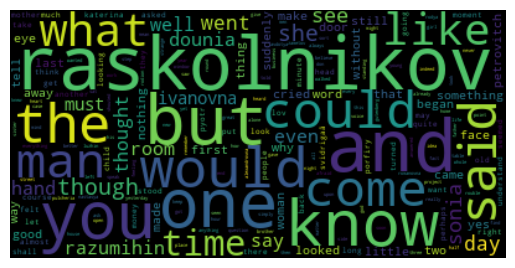

In [43]:

import matplotlib.pyplot as plt
word_cloud = WordCloud()
word_cloud.generate_from_frequencies(vocabulary_dict)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [44]:
#############################
# CHANGE DESCRIPTION
# 100-150 words on the changes I’ve made, including a reference to which initial command I’ve changed >
# I had change the code to perform the below experiment to better understand the usage of the nltk, 
# and beutiful soap library 
# Experiment 1 : track certain keyword in the whole text using dispersion_plot which could visually see the ditrubution of the keyword's location (reference https://www.nltk.org/api/nltk.draw.dispersion_plot.html)
# Experiment 2 : see how is the data structure of the sorted_counts looks like, it is list of tuple as (keyword,count) 
# Experiment 3 : try a random website and check try the usage of the beautifulsoap library
# Experiment 4 : Try to use most_common(n) method to find the first n most common keyword in Count class
# Experiment 5 : Try to use the word cloud to check the word frequency of the C&P book
# Reference:
# https://www.nltk.org/api/nltk.draw.dispersion_plot.html
# https://www.polarsparc.com/xhtml/Document-Similarity-NLP.html
# https://www.nltk.org/_modules/nltk/stem/wordnet.html
# https://www.geeksforgeeks.org/python-nltk-tokenize-wordpuncttokenizer/
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# END OF CHANGE DESCRIPTION
#############################